# GRADCAM
### Assignment
First Part: <br>
Refer to the GRADCAM code we wrote (Links to an external site. https://github.com/raghakot/keras-vis/tree/master/examples/vggnet ) <br>
Build GradCAM images for the one layer before the one we used, and one layer before this one. Show the results. <br>

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import cv2
import keras.backend as K





1.   Loading helper functions
2.   Load VGG
3.   Load Image
4.   Rescale image to 224x224x3 (VGG's expectation, why?)
5.   Use expand_dims to convert image to a batch of size 1
6.   Preprocesing normalizes our input image by subtracting mean RGB values



In [0]:
model = VGG16(weights="imagenet")
from skimage import io
cat = io.imread("http://www.petsworld.in/blog/wp-content/uploads/2014/09/funny-cat.jpg")
cat = cv2.resize(cat, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)

x = image.img_to_array(cat)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [0]:
type(x)
x.shape

(1, 224, 224, 3)

1. We get the predictions for the image
2. We take the topmost class index
3. Take output from the final convolutional layer

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

### GRADCAM : Running gradcam on block5_conv2

In [0]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv2")

281


1. Compute the gradient of the class output value with respect to the feature map
2. Pool the gradients over all the axies leaving out the channel dimension
3. Weigh the output feature map with the computed gradient values

In [0]:
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

(?, 14, 14, 512)
(512,)


1. Average the weighted feature map along the channel dimension resulting in a heat map of size 14x14 
2. Normalize the heat map to make the values between 0 and 1

In [0]:
heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

(14, 14, 512)
(14, 14)


Show the results

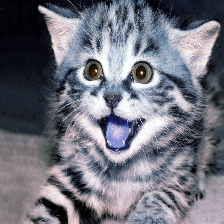

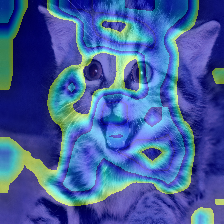

In [0]:
heatmap = cv2.resize(heatmap, (cat.shape[1], cat.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(cat, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow( cat)
cv2_imshow(superimposed_img)

### GRADCAM : Running gradcam on block5_conv1

In [0]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv1")

281


1. Compute the gradient of the class output value with respect to the feature map
2. Pool the gradients over all the axies leaving out the channel dimension
3. Weigh the output feature map with the computed gradient values

In [0]:
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

(?, 14, 14, 512)
(512,)


1. Average the weighted feature map along the channel dimension resulting in a heat map of size 14x14 
2. Normalize the heat map to make the values between 0 and 1

In [0]:
heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

(14, 14, 512)
(14, 14)


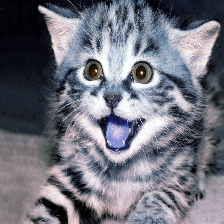

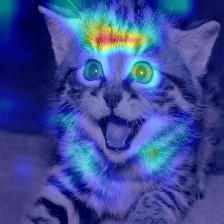

In [0]:
heatmap = cv2.resize(heatmap, (cat.shape[1], cat.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(cat, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow( cat)
cv2_imshow(superimposed_img)

### Assignment:
3.   Load this image  (Links to an external site.) https://media.karousell.com/media/photos/products/2018/08/20/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg
4.  "Find"  "sunglasses" in the image using GradCAM

In [0]:
# Load and preprocess this image
test_image = io.imread("https://raw.githubusercontent.com/thamizhannal/EIP3/master/images/avenger3.jpg")
test_image = cv2.resize(test_image, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)

x = image.img_to_array(test_image)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [0]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv3")

837


#### As I verified class id for sunglasses it is 836,837. Since class_idx is 837, this id needs not to be changed.
Ref: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a


In [0]:
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

(?, 14, 14, 512)
(512,)


In [0]:
heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

(14, 14, 512)
(14, 14)


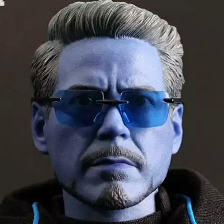

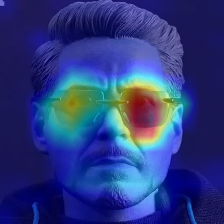

In [0]:
heatmap = cv2.resize(heatmap, (test_image.shape[1], test_image.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(test_image, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow( test_image)
cv2_imshow(superimposed_img)


### Assignment:
2.   Second Part:
      1.   Refer to this paper: https://arxiv.org/pdf/1701.03056.pdf (Links to an external site.)
      2.  Go to page 21, table 7
      3.  The Receptive field increases from 29 to 45.
      4.  Explain this increase
      
      
      
| Convolution  |      Input    |	Output	    | ReceptiveField |	k,p,s	|  Jin	| Jout |
|:-------------:|:-------------:|:-------------:|:--------------:|:--------:|:-----:|:-----:|
| 	1 	|  128x128x96 	| 128x128x96 	| 3x3x3			 |	3,1,1	|	1	|	1	|		
| 	2 	|  128x128x96   | 64x64x48		| 5x5x5			 |	3,1,2	|	1	|	2	|	
|	3			|  64x64x48		| 64x64x48		| 9x9x9			 |	3,1,1	|	2	|	2	|
|	4	 		|  64x64x48 	| 32x32x24	  	| 13x13x13		 |	3,1,2	|	2	|	4	|
|	5			|  32x32x24		| 32x32x24		| 21x21x21		 |	3,1,1	|	4	|	4	|
|	6			|  32x32x24		| 16x16x12		| 29x29x29		 |	3,1,2	|	4	|	8	|
|	7			|  16x16x24		| 16x16x12		| 45x45x45		 |	3,1,1	|	8	|	8	|
------------------------------------------------------------------------------------------------------------------- <br>


Formulas:
---------
Nout = [(Nin + 2p -k)/s]+1 <br>
Jout = Jin * s <br>
Rout = Rin +(k-1)*Jin <br>

Nin = input size <br>
k,p,s = kernel,padding,stride <br>
Jin	= Jump input <br>
Jout=Jump output <br>
Rin=ReceptiveField Input <br>
Rout=ReceptiveField output <br>

convolution 1: <br>
---------------
Nout = [(128+2(1)-3)/1]+1 = 128 <br>
Jout = 1*1 = 1 (Jin=1 for initial convolution,s=1 from table) <br>
Rout = 1+(3-1)*1 = 3  <br>

convolution 2: <br>
---------------------- 
Nout = [(128+2(1)-3)/2]+1 = 64 <br>
Jout = 1*2 = 2 (Jin=1,s=2) <br>
Rout = 3+(3-1)*1 = 5 <br>

convolution 3: <br>
---------------------- 
Nout = [(64+2(1)-3)/1]+1 = 64 <br>
Jout = 2*1 = 2 (Jin=2,s=1) <br>
Rout = 5+(3-1)*2 = 9 <br>
	  		 	 	
convolution 4: <br>
---------------------- 
Nout = [(64+2(1)-3)/2]+1 = 32 <br>
Jout = 2*2 = 4 (Jin=2,s=2) <br>
Rout = 9+(3-1)*2 = 13 <br>

convolution 5: <br>
---------------------- 
Nout = [(32+2(1)-3)/1]+1 = 32 <br>
Jout = 4*1 = 4 (Jin=4,s=1) <br>
Rout = 13+(3-1)*4 = 21 <br>

convolution 6: <br>
--------------------- 
Nout = [(32+2(1)-3)/2]+1 = 16 <br>
Jout = 4*2 = 8 (Jin=4,s=2) <br>
Rout = 21+(3-1)*4 = 29 <br>

convolution 7: <br>
---------------------- 
Nout = [(16+2(1)-3)/1]+1 = 16  <br>
Jout = 8*1 = 8 (Jin=8,s=1)  <br>
Rout = 29+(3-1)*8 = 45  <br>

Conclusion:  <br>
=============
During 7th convolution,  Both input and output units have same size as 16, Jump input size is 8 and stride is 1, When you apply these values in ReceptiveField output calculation formula, we get 45 as output RF. This is explained in above convolution 7 step.  <br>


      
      